### Diffusion à une dimension

Soit l'équation( du/dt) = v (d²u/dt²) avec v(nu) la viscosité. On va donc devoir discrétiser les dérivées secondes !

In [1]:
import numpy                       
from matplotlib import pyplot    
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

#### Condition de stabilité

Cette fois , la condition pour que ce soit stable est vdt/(dx)²<=0.5.

In [2]:
nx=41
dx=2./(nx-1)
nt=20
nu=0.3
sigma=0.2
dt=sigma*dx**2/nu

x = numpy.linspace(0,2,nx)
ubound = numpy.where(x >= 0.5)
lbound = numpy.where(x <= 1)

u = numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)] = 2  

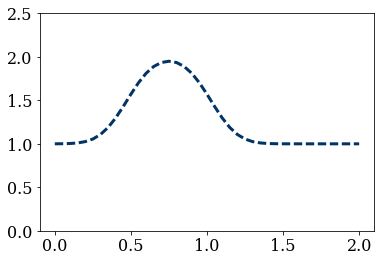

In [3]:
for n in range(nt):  
    un = u.copy() 
    u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] -2*un[1:-1] +un[0:-2]) 
        
pyplot.plot(x, u, color='#003366', ls='--', lw=3)
pyplot.ylim(0,2.5);

In [4]:
from matplotlib import animation
from IPython.display import HTML

In [5]:
nt = 50

u = numpy.ones(nx)      
u[numpy.intersect1d(lbound, ubound)] = 2  

un = numpy.ones(nx) 

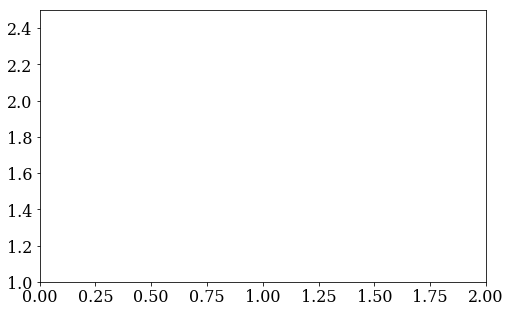

In [6]:
fig = pyplot.figure(figsize=(8,5))
ax = pyplot.axes(xlim=(0,2), ylim=(1,2.5))
line = ax.plot([], [], color='#003366', ls='--', lw=3)[0]

In [7]:
def diffusion(i):
    line.set_data(x,u)
    
    un = u.copy() 
    u[1:-1] = un[1:-1] + nu*dt/dx**2*(un[2:] -2*un[1:-1] +un[0:-2]) 

### Détails de l'animation

° fig = le nom de la figure
° diffusion = le nom de notre fonction qui solve
° frames = nombre d'images à afficher (ici =nt)
° interval = nombre de ms que reste chaque image

In [8]:
anim = animation.FuncAnimation(fig, diffusion,
                               frames=nt, interval=100)

In [9]:
HTML(anim.to_html5_video())